This homework is intended to test your understanding of concepts related to imbalanced datasets. The starter code for accessing the dataset is given below. Explicit instructions will then follow.

In [1]:
from sklearn.datasets import fetch_openml
## mammography https://www.openml.org/d/310
data = fetch_openml('mammography', as_frame=True)
X, y = data.data, data.target
X.shape

C:\Users\Vineetha Varma\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(11183, 6)

In [2]:
import numpy as np
import pandas as pd


In [3]:
#let us put everything into a dataframe
df = pd.DataFrame(X, columns = data.feature_names)
df.head()


,attr1,attr2,attr3,attr4,attr5,attr6
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566


In [4]:
df['class'] = y
df.tail()

,attr1,attr2,attr3,attr4,attr5,attr6,class
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1
11182,0.177003,-0.191508,-0.501468,1.578864,7.750705,1.555951,1


In [5]:
#let us look at the index
df.index

RangeIndex(start=0, stop=11183, step=1)

In [6]:
df['class'].value_counts()

-1    10923
1       260
Name: class, dtype: int64

In [7]:
df['class'].dtype

CategoricalDtype(categories=['-1', '1'], ordered=False)

In [8]:
df['class'] = df['class'].astype(int)
df['class'] = df['class'].map(lambda x: 0 if x == -1 else 1)
df['class'].value_counts()

0    10923
1      260
Name: class, dtype: int64

In [9]:
#get a description of the dataset
print(data.DESCR)

**Author**:   
  
**Source**: Unknown -   
**Please cite**:   

Mammography dataset

Past Usage:
1. Woods, K., Doss, C., Bowyer, K., Solka, J., Priebe, C.,

Downloaded from openml.org.


Do some preliminary data exploration. Check to see if scaling might be an issue. Create scatter plots to see if you can discern any patterns. The packages featurewiz and bamboolib may be useful for this purpose. 

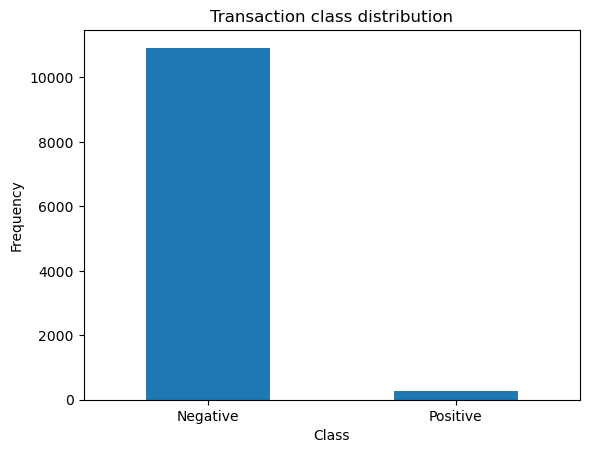

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#plotting bar graph to determine the count of each value of target variable inorder to check data imbalance
count_classes = pd.value_counts(df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ["Negative","Positive"])
plt.xlabel("Class")
plt.ylabel("Frequency");

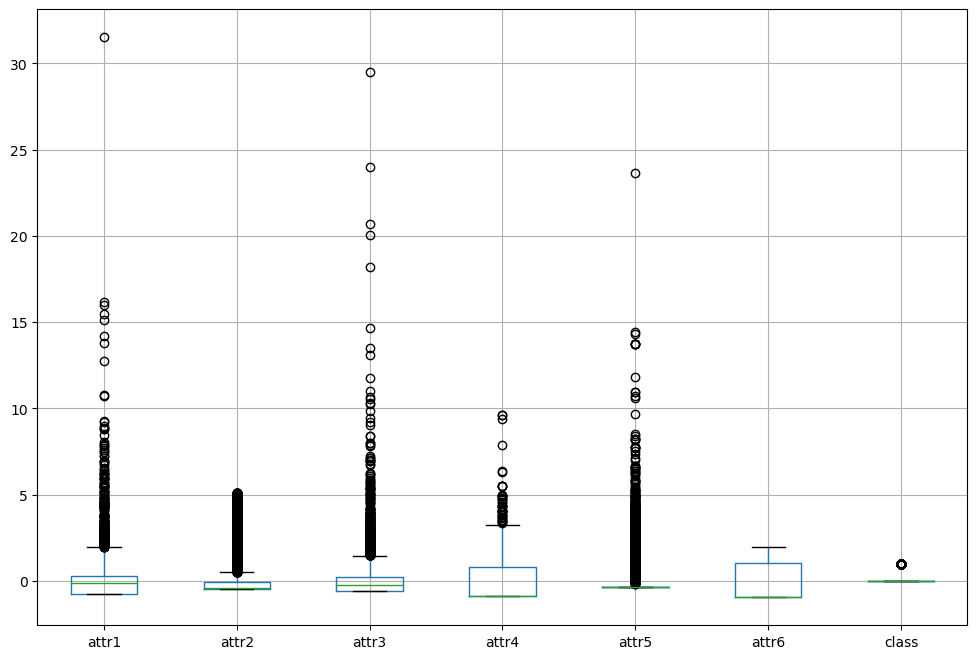

In [11]:
#box plot
df.boxplot(figsize=(12, 8))
plt.show()

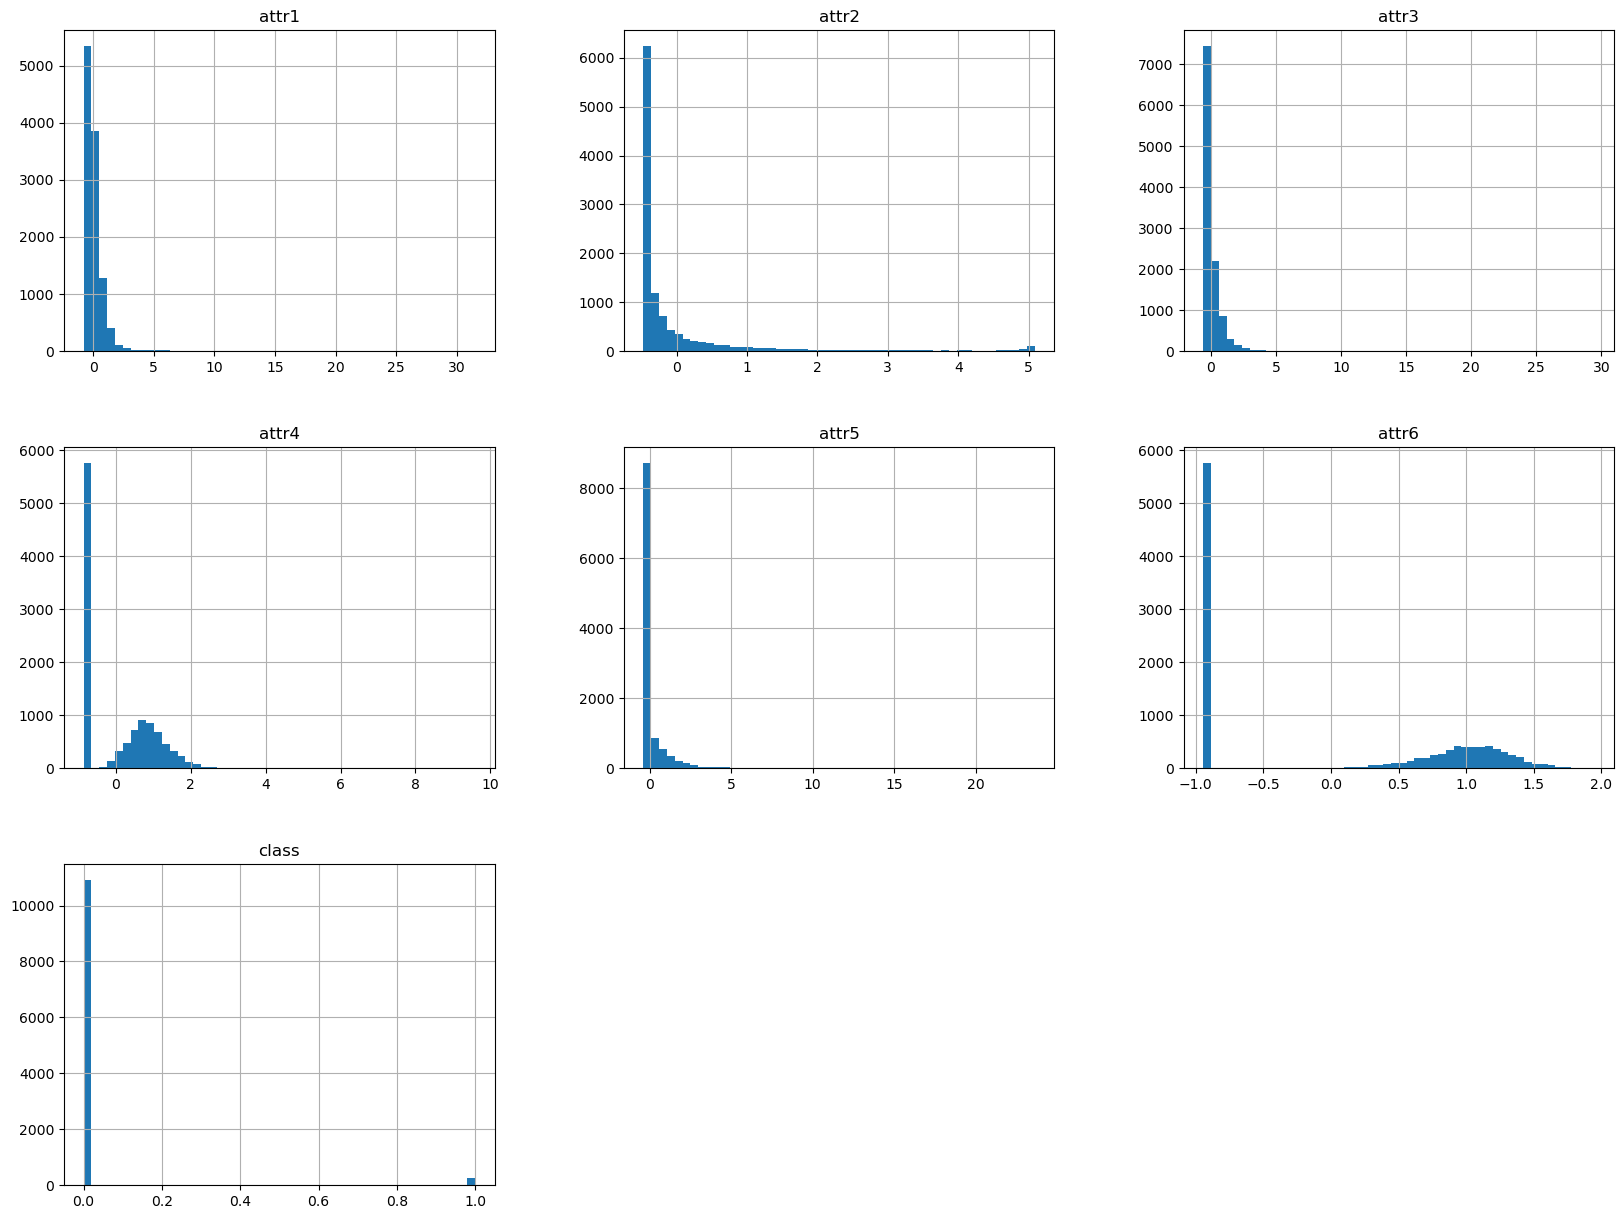

In [12]:
#plotting histogram
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [13]:
#finding the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

          attr1     attr2     attr3     attr4     attr5     attr6     class
attr1  1.000000  0.401205  0.019329  0.296330  0.121622  0.196630  0.119547
attr2  0.401205  1.000000  0.015448  0.258984  0.021408  0.146379 -0.018092
attr3  0.019329  0.015448  1.000000  0.220777  0.005885  0.277189 -0.047275
attr4  0.296330  0.258984  0.220777  1.000000  0.406464  0.867821  0.257561
attr5  0.121622  0.021408  0.005885  0.406464  1.000000  0.404119  0.472887
attr6  0.196630  0.146379  0.277189  0.867821  0.404119  1.000000  0.168960
class  0.119547 -0.018092 -0.047275  0.257561  0.472887  0.168960  1.000000


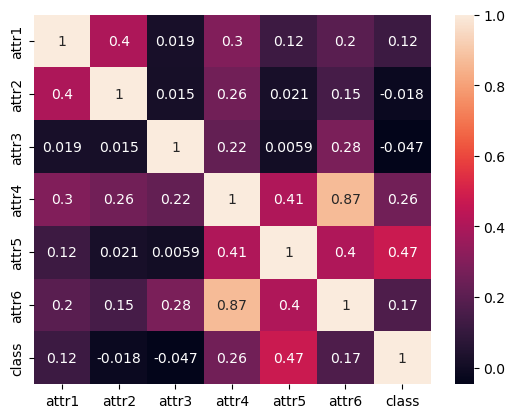

In [14]:
#plotting heatmap using seaborn
import seaborn as sns
sns.heatmap(correlation_matrix,annot = True)
plt.show()

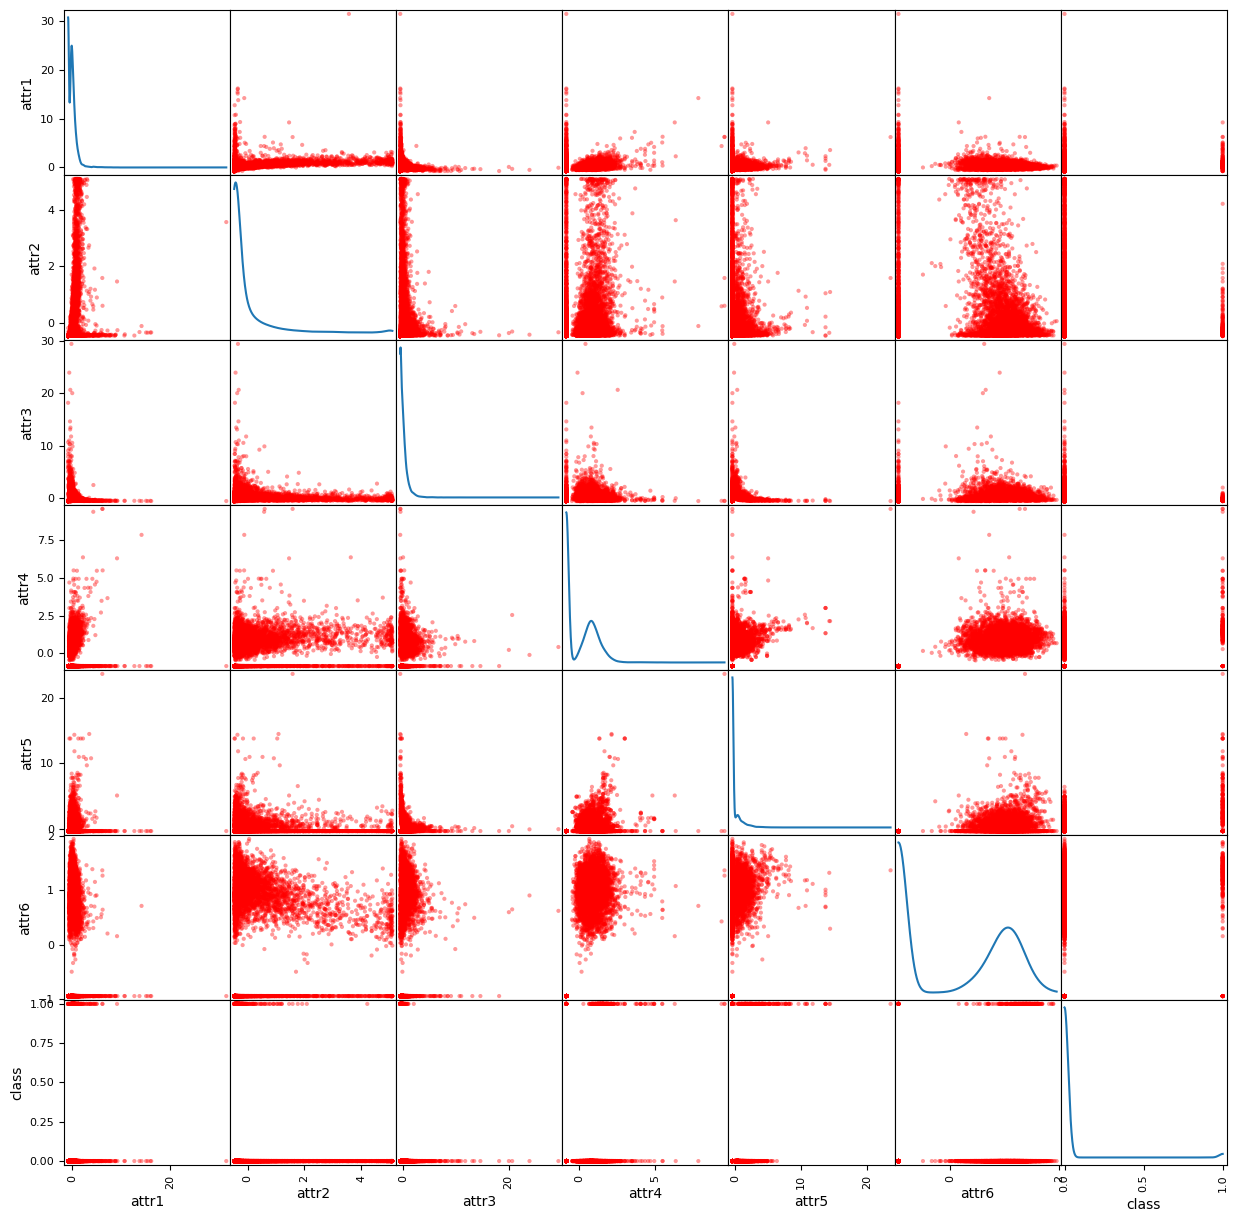

In [15]:
#plotting the scatter plot using scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15), alpha = 0.4, diagonal = 'kde', color = 'red')
plt.show()

In [16]:
#plotting scatter matrix using bamboolib
import bamboolib as bam
df

          attr1     attr2     attr3     attr4     attr5     attr6  class
0      0.230020  5.072578 -0.276061  0.832444 -0.377866  0.480322      0
1      0.155491 -0.169390  0.670652 -0.859553 -0.377866 -0.945723      0
2     -0.784415 -0.443654  5.674705 -0.859553 -0.377866 -0.945723      0
3      0.546088  0.131415 -0.456387 -0.859553 -0.377866 -0.945723      0
4     -0.102987 -0.394994 -0.140816  0.979703 -0.377866  1.013566      0
...         ...       ...       ...       ...       ...       ...    ...
11178 -0.250012 -0.377300 -0.321142  1.269157  3.652984  1.092791      1
11179  0.281343 -0.417112 -0.366224  0.851010  2.789649  1.345700      1
11180  1.204988  1.763724 -0.501468  1.562408  6.489072  0.931294      1
11181  0.736644 -0.222474 -0.050653  1.509665  0.539269  1.315229      1
11182  0.177003 -0.191508 -0.501468  1.578864  7.750705  1.555951      1

[11183 rows x 7 columns]

Text(0.5, 1.0, 'Scatter Plot Example')

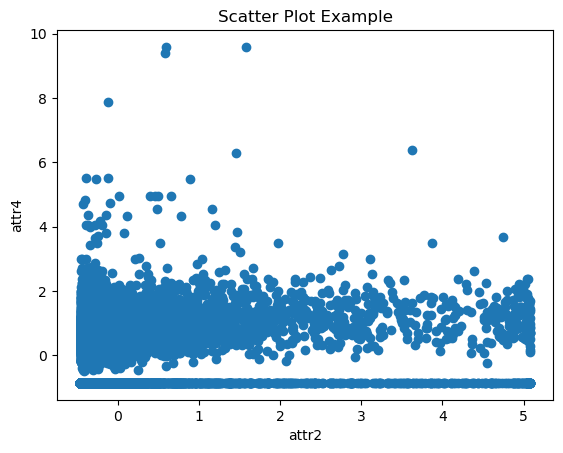

In [17]:
#to create a scatter plot using attr2 and attr4
c1= 'attr2'
c2= 'attr4'
plt.scatter(X[c1],X[c2])    
plt.xlabel(c1)
plt.ylabel(c2)
plt.title('Scatter Plot Example')

In [ ]:
#From data visualisation about scaling importance
#From above box plots its clearly observed that there are more outliers in the data indicating that the data must be scaled

#From histogram plot its clearly observed that the data is left-skewed indicating that data has more negative values
#and scaling is required 

#From scatter matrix also its clearly observed that there are more outliers in the data indicating that the data must be scaled

Split your data into train and test sets. Do NOT modify the train and test sets. Use LogisticRegression WITHOUT class_weight to train and test your model. Show the confusion matrix and classification report. This would be the performance of the model before trying out class_weight, oversampling, undersampling, and a combination of oversampling/undersampling.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
#assigning the target to y variable
df['class'] = y

In [20]:
#dropping the target from the dataframe
df = df.drop('class', axis = 1)

In [21]:
#splitting the data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(df, y, shuffle = True,
                                                   train_size = 0.8,
                                                   stratify = y,
                                                   random_state = 100)

In [22]:
#scaling the data using the Standard Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
#getting count of each value in the target data
y_train.value_counts()

-1    8738
1      208
Name: class, dtype: int64

In [24]:
#getting the dimensions of x_test and y_test
x_test.shape, y_test.shape

((2237, 6), (2237,))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [26]:
#applying the Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [27]:
#predicting using logistic regression
y_pred = clf.predict(x_test)

In [28]:
#getting the value counts of y test
y_test.value_counts()

-1    2185
1       52
Name: class, dtype: int64

In [29]:
#confusion matrix for logistic regression model built
matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

In [30]:
#function to display confusion matrix
LABELS = ["Negative","Positive"]
#negative means no cancer positive means having cancer
#for confusion matrix visualisation
def draw_matrix(conf_matrix, LABELS):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS,
                yticklabels=LABELS, annot=True, fmt="f");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

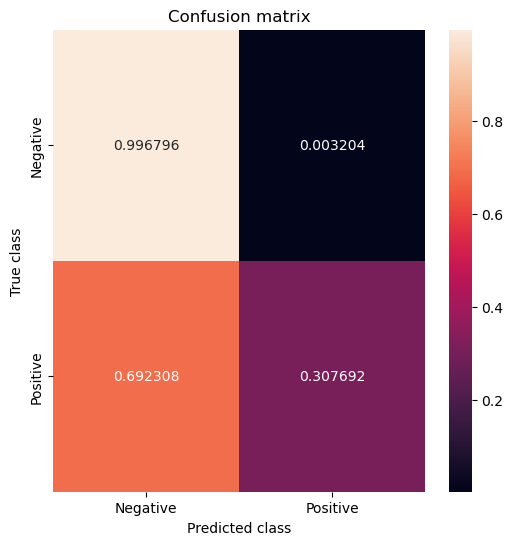

In [31]:
draw_matrix(matrix, LABELS)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      2185
           1       0.70      0.31      0.43        52

    accuracy                           0.98      2237
   macro avg       0.84      0.65      0.71      2237
weighted avg       0.98      0.98      0.98      2237



Correct for imbalance. Create and test models using the following:
a) Use LogisticRegression with class_weight = 'balanced'. Create a confusion matrix and classification report.
b) Perform Oversampling using SMOTE. Create a confusion matrix and classification report.
c) Perform Undersampling using NearMiss. Create a confusion matrix and classification report.
d) Try a combination of oversampling and undersampling (see my example of creditcard frauds). Again, create a confusion matrix and classification report.


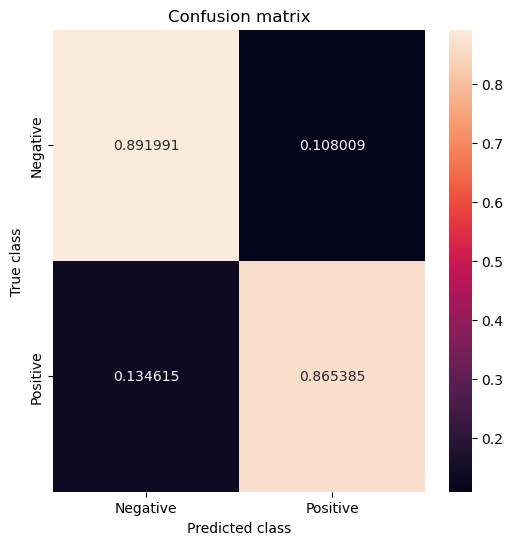

In [33]:
#a)usinglogistic regression with class weight
clf = LogisticRegression(class_weight = 'balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
#confusion matrix for logistic regression model with class weight balanced
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [34]:
#generating the report to know the the scores of metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.89      0.94      2185
           1       0.16      0.87      0.27        52

    accuracy                           0.89      2237
   macro avg       0.58      0.88      0.61      2237
weighted avg       0.98      0.89      0.93      2237



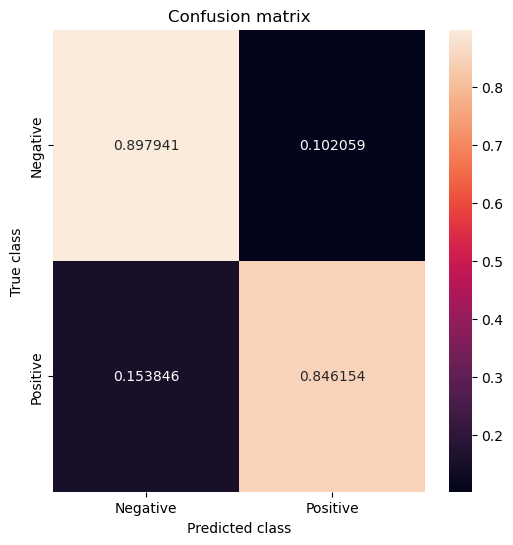

In [35]:
#b)Perform Oversampling using SMOTE
from imblearn.over_sampling import SMOTE 
smte = SMOTE() 
#resampling the train data using smote technique for oversampling purpose
x_resampled, y_resampled = smte.fit_resample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(x_resampled, y_resampled)
y_pred = clf.predict(x_test)
#confusion matrix for oversampling model-SMOTE and plotting it
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.90      0.94      2185
           1       0.16      0.85      0.28        52

    accuracy                           0.90      2237
   macro avg       0.58      0.87      0.61      2237
weighted avg       0.98      0.90      0.93      2237



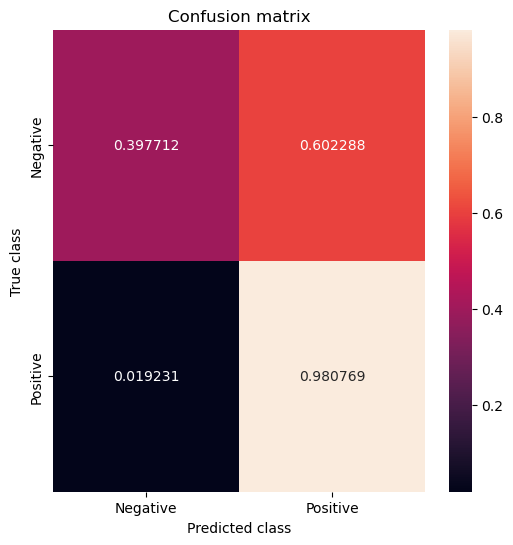

In [37]:
#c)Perform Undersampling using NearMiss
from imblearn.under_sampling import NearMiss 
nme = NearMiss() 
#resampling the train data using nearmiss technique for undersampling purpose
x_resampled, y_resampled = nme.fit_resample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(x_resampled, y_resampled)
y_pred = clf.predict(x_test)
#confusion matrix for undersampling model-nearmiss and plotting it
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.40      0.57      2185
           1       0.04      0.98      0.07        52

    accuracy                           0.41      2237
   macro avg       0.52      0.69      0.32      2237
weighted avg       0.98      0.41      0.56      2237



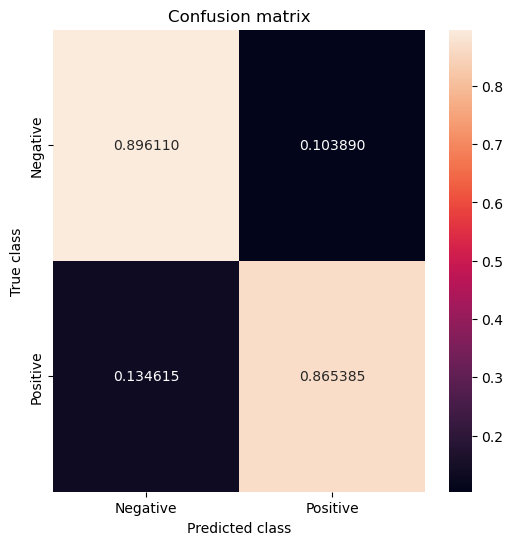

In [40]:
#combination of oversampling and undersampling
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
#resampling the train data using smoteenn technique for combining both oversampling and undersampling
x_resampled, y_resampled = smo.fit_resample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(x_resampled, y_resampled)
y_pred = clf.predict(x_test)
#confusion matrix for smotenn and plotting it
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.90      0.94      2185
           1       0.17      0.87      0.28        52

    accuracy                           0.90      2237
   macro avg       0.58      0.88      0.61      2237
weighted avg       0.98      0.90      0.93      2237



In [ ]:
#summary

#combination of oversampling and undersampling smoteenn is better since it has more true positive(0.896110)
#and true negative(0.865385) both as observed in confusion matrix when compared to smote(oversampling) 
#and nearmiss(undersampling)

#Coming to Recall metric for smote(oversampling) technique -1 has 0.90 value and 1 has got 0.85 values
#For Nearmiss(undersampling) technique -1 has 0.40 value and 1 has 0.98 value
#For SMOTEENN (combination of oversampling and undersampling) technique -1 has 0.90 and 1 has 0.87 values 
#since this has high values for both -1 and +1 (negative and positive cancer) this is best model 

#Recall is an important metric because true positive rate should be high in case of cancer dataset

Summarize your findings. Which model would you choose and why?